# Gamma/Hadron Separation using TensorFlow/Keras 

# Setup

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('magic04.data', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Preprocessing

We will perform ordinal encoding to convert target classes to binary values as the ANN will not accept string input

In [4]:
data = data.replace('g', 1) # gamma = 1
data = data.replace('h', 0) # hadron = 0

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## Sampling

We will allocate 30% of our data set for testing and the remaining 70%| for training

In [6]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
# split 70% training, 30% test
train_set, test_set = split_train_test(data, 0.3)

In [8]:
len(train_set) / len(data)

0.7

In [9]:
len(test_set) / len(data)

0.3

Splitting into separate x and y training sets

In [10]:
y_train = train_set[10]
y_test = test_set[10]

x_train = train_set.drop(10, axis=1)
x_test = test_set.drop(10, axis=1)

# Training a Model

Since we are performing binary classification, we will use a sigmoid (logistic) activation function in the output layer.

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [77]:
model.build([1,10])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (1, 100)                  1100      
                                                                 
 dense_26 (Dense)            (1, 1)                    101       
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


Furthermore, we will use the binary_crossentropy loss function since we are performing a binary classification

In [78]:
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [79]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
375/375 [==============================] - 1s 904us/step - loss: 0.9455 - accuracy: 0.7508 - val_loss: 0.4763 - val_accuracy: 0.7695
Epoch 2/30
375/375 [==============================] - 0s 700us/step - loss: 0.4947 - accuracy: 0.7691 - val_loss: 0.4706 - val_accuracy: 0.7688
Epoch 3/30
375/375 [==============================] - 0s 698us/step - loss: 0.4818 - accuracy: 0.7733 - val_loss: 0.4920 - val_accuracy: 0.7703
Epoch 4/30
375/375 [==============================] - 0s 707us/step - loss: 0.4732 - accuracy: 0.7831 - val_loss: 0.4852 - val_accuracy: 0.7778
Epoch 5/30
375/375 [==============================] - 0s 685us/step - loss: 0.4672 - accuracy: 0.7884 - val_loss: 0.4640 - val_accuracy: 0.7995
Epoch 6/30
375/375 [==============================] - 0s 691us/step - loss: 0.4583 - accuracy: 0.7911 - val_loss: 0.4476 - val_accuracy: 0.8018
Epoch 7/30
375/375 [==============================] - 0s 696us/step - loss: 0.4563 - accuracy: 0.7970 - val_loss: 0.4366 - val_accuracy:

## Evaluating the Model

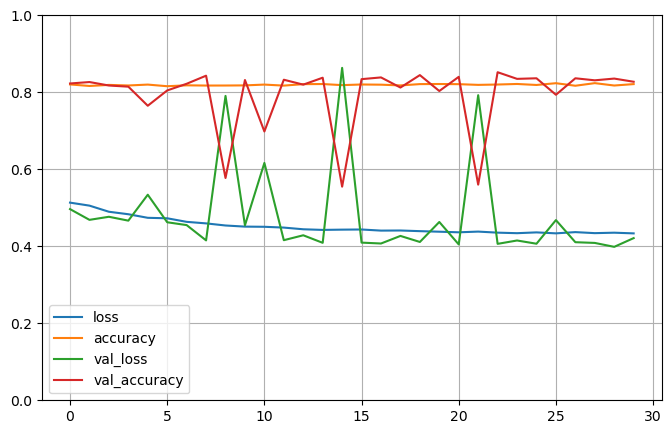

In [90]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [92]:
model.evaluate(x_test, y_test)

179/179 [==============================] - 0s 530us/step - loss: 0.4377 - accuracy: 0.8058


[0.4376879632472992, 0.8058184385299683]

## Making Predictions

In [93]:
x_new = x_test[:10]
y_prob = model.predict(x_new)

y_pred = y_prob.round(0)

1/1 [==============================] - 0s 29ms/step


Let's visually compare the predicted values vs. the actual values

In [94]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [95]:
y_test[:10]

8492     1
7014     1
9781     1
930      1
15657    0
13763    0
6971     1
12753    0
13134    0
5664     1
Name: 10, dtype: int64

To convert the binary values back into the original classes, we can define a classification function *classify()*

In [96]:
def classify(probability):
    if probability > 0.5:
        return 'g'
    else:
        return 'h'

In [97]:
y_pred = []

for i in y_prob:
    y_pred.append(classify(i))
    
y_pred = np.reshape(y_pred, (10, 1))

y_pred

array([['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['g'],
       ['h'],
       ['g'],
       ['g']], dtype='<U1')

# Hyperparameter Fine-Tuning

In [98]:
def build_model(n_hidden=1, n_neurons=10, l1=0.01, l2=0.01):
    model = keras.models.Sequential()
    
    # add n number of hidden layers
    for layer in range(n_hidden):
        # each layer will have n number of neurons
        model.add(keras.layers.Dense(n_neurons, activation="relu", 
                                     kernel_regularizer=keras.regularizers.l1_l2(l1=l1, l2=l2))) 
        
    model.add(keras.layers.Dense(1, activation="sigmoid")) # add output layer
    
    model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"]) # compile model
    
    return model
    

We will use a SciKit-Learn for hyperparamater tuning by using a Keras wrapper.

In [99]:
keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)

C:\Users\thoma\AppData\Local\Temp\ipykernel_14720\1341954221.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = keras.wrappers.scikit_learn.KerasClassifier(build_model)


In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
params = {
    "n_hidden": [0, 1, 2],
    "n_neurons": [50, 100, 200],
    "l1": [0.01, 0.001],
    "l2": [0.01, 0.001]
}

In [102]:
grid_search = GridSearchCV(keras_clf, params, cv=5, n_jobs=-1)

grid_search.fit(x_train, y_train, epochs=15, validation_split=0.1,
               callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/15
375/375 [==============================] - 1s 1ms/step - loss: 2.0017 - accuracy: 0.7414 - val_loss: 1.5128 - val_accuracy: 0.7613
Epoch 2/15
375/375 [==============================] - 0s 801us/step - loss: 1.4998 - accuracy: 0.7672 - val_loss: 1.5098 - val_accuracy: 0.7635
Epoch 3/15
375/375 [==============================] - 0s 805us/step - loss: 1.4337 - accuracy: 0.7734 - val_loss: 1.3818 - val_accuracy: 0.7913
Epoch 4/15
375/375 [==============================] - 0s 802us/step - loss: 1.3717 - accuracy: 0.7850 - val_loss: 1.3266 - val_accuracy: 0.7920
Epoch 5/15
375/375 [==============================] - 0s 795us/step - loss: 1.3136 - accuracy: 0.7898 - val_loss: 1.2652 - val_accuracy: 0.8086
Epoch 6/15
375/375 [==============================] - 0s 801us/step - loss: 1.2589 - accuracy: 0.7928 - val_loss: 1.2044 - val_accuracy: 0.8063
Epoch 7/15
375/375 [==============================] - 0s 796us/step - loss: 1.2055 - accuracy: 0.7978 - val_loss: 1.1889 - val_accuracy: 0

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000214A1F7BE80>,
             n_jobs=-1,
             param_grid={'l1': [0.01, 0.001], 'l2': [0.01, 0.001],
                         'n_hidden': [0, 1, 2], 'n_neurons': [50, 100, 200]})

In [198]:
grid_search.best_params_

{'l1': 0.001, 'l2': 0.001, 'n_hidden': 2, 'n_neurons': 100}

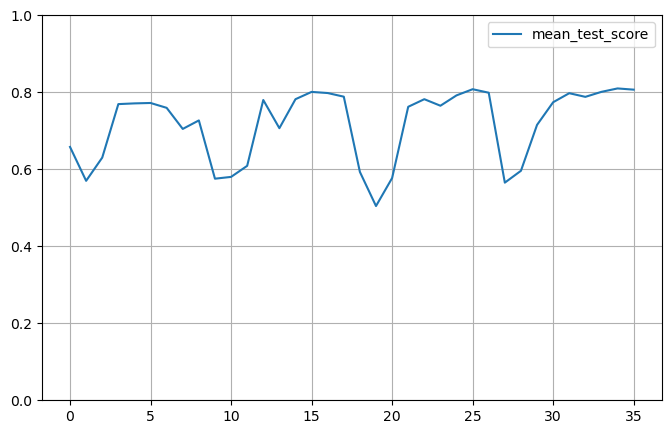

In [199]:
values = pd.DataFrame()

values['mean_test_score'] = grid_search.cv_results_['mean_test_score']

values.plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1)

plt.grid(True)
plt.show()

In [200]:
optimised_model = grid_search.best_estimator_.model

optimised_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               1100      
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


# Tuning Results

## Before

In [201]:
results_1 = model.evaluate(x_test, y_test)

179/179 [==============================] - 0s 534us/step - loss: 0.4377 - accuracy: 0.8058


## After

In [202]:
results_2 = optimised_model.evaluate(x_test, y_test)

179/179 [==============================] - 0s 629us/step - loss: 0.4294 - accuracy: 0.8288


In [203]:
increase = (results_2[1] / results_1[1] - 1) * 100

str(np.round(increase, 2)) + '% increase in accuracy.'

'2.85% increase in accuracy.'